# <a id="Import"></a>
# <p style="background-color: #422057FF; font-family: 'Copperplate'; color:#FDDB27FF; font-size:140%; text-align:center; border-radius:1000px 10px;">1.0 About Author</p> 

<div style="border: 2px solid #006B38FF; padding: 10px; max-width: 1500px;">
    <p>
        I am <b>Atif Ali Khokhar</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of #KeepLearning and #KeepSupporting, as I am committed to constant growth and uplifting others in the field.
    </p>
    <div style="text-align: center;">
        <img src="https://media.licdn.com/dms/image/D4E03AQHbj9PaMNpUuQ/profile-displayphoto-shrink_400_400/0/1694879278829?e=1721260800&v=beta&t=XWss7C6pbhbBWJoETbMhxsQASHKpP9Vkf7qty24U6Hs" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%; border: 2px solid #D35400;"><br>
    </div>
    <p>
        You can find more about me on my <a href="https://www.linkedin.com/in/atifalikhokhar/" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>

# <a id="Import"></a>
# <p style="background-color: #422057FF; font-family: 'Copperplate'; color:#FDDB27FF; font-size:140%; text-align:center; border-radius:1000px 10px;">2.0 About Project and Data</p> 

## Project Title: Brain Tumor MRI Classifier: CNN to the Rescue

### **Overview:**
    This Kaggle notebook is dedicated to the classification of brain tumors from MRI images into four specific categories: Glioma, Meningioma, No Tumor, and Pituitary. Leveraging the power of Convolutional Neural Networks (CNNs), this project aims to automate the process of tumor detection and classification, providing a crucial tool for early diagnosis and effective treatment planning.
    
### **Objective:**
    The primary goal of this notebook is to develop a Convolutional Neural Network (CNN) model that can accurately classify MRI images into the four defined categories. By utilizing advanced deep learning techniques, we aim to build a model that not only performs with high accuracy but also generalizes well to new, unseen data, making it a valuable asset in medical diagnostics.

### **Class Descriptions:**
**Glioma**: Tumors originating from the glial cells in the brain, gliomas are common and can range from low-grade, less aggressive forms to high-grade, highly malignant varieties. Early and precise classification is essential for effective treatment.

**Meningioma**: Arising from the meninges, the protective membranes covering the brain and spinal cord, meningiomas are typically benign but can cause significant problems due to their size and location. Identifying meningiomas accurately is crucial for patient management.

**No Tumor**: This class includes MRI images that show no evidence of tumorous growth. Correctly identifying no-tumor images is vital to avoid unnecessary treatments and to maintain high diagnostic accuracy.

**Pituitary**: Pituitary tumors develop in the pituitary gland at the brain's base. These tumors can disrupt hormonal balance and lead to systemic issues, making their detection important for appropriate medical intervention.


### **Dataset:**
[brain-tumor-mri-dataset](/kaggle/input/brain-tumor-mri-dataset)

### **Approach:**
**Data Preprocessing:**
Load and preprocess the orange leaf images.
Normalize pixel values and augment the dataset to improve model generalization.

**Model Architecture:**
Build a CNN architecture suitable for image classification.
Utilize convolutional layers, pooling layers, and fully connected layers.
Experiment with different architectures.

**Training and Validation:**
Split the dataset into training and validation sets.
Train the CNN model using labeled images.
Monitor training progress using loss and accuracy metrics.

**Evaluation:**
Evaluate the trained model on a separate test set.

**Predictions:**
Use the trained model to predict disease classes for unseen orange leaf images.
Interpret model predictions and identify areas for improvement.


    Explore this notebook to see how cutting-edge CNN architectures can be applied to the challenging yet rewarding task of brain tumor classification. Join us in advancing medical imaging technology and making a real difference in healthcare!

# <a id="Import"></a>
# <p style="background-color: #422057FF; font-family: 'Copperplate'; color:#FDDB27FF; font-size:140%; text-align:center; border-radius:1000px 10px;">3.0 Data Processing</p> 

### **3.1 Importing Libraries** 

In [1]:
# Veri manipülasyonu için
import numpy as np 
import pandas as pd 

# Veri görselleştirmesi için
import matplotlib.pyplot as plt 
import seaborn as sns

# Uyarılı göz ardı etmek
import warnings
warnings.filterwarnings('ignore')

# DL kütüphaneleri
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory

# Diğer kütüphaneler
import os
import random

2024-07-18 13:52:51.377534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 13:52:51.377641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 13:52:51.682536: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### **3.1 Loading Image Dataset from Directory**

In [2]:
# Görüntü veri setini utils kullanarak dizinden yükleyin
# ds = image_dataset_from_directory('E:\DataScience Codanics\Kaggle\LAPTOP Items classification\PC Part Classification\Data')

train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/kaggle/input/brain-tumor-mri-dataset/Training',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = r'/kaggle/input/brain-tumor-mri-dataset/Testing',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


### **3.2 Visualize the images**

In [3]:
# Görüntüleri görselleştirmek için bir fonksiyon oluşturma

def visualize_images(path, num_images=5):

    # Resim dosya adlarının bir listesini alın
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("Belirtilen yolda hiçbir görüntü bulunamadı")

    # SRastgele resimler seçin
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Bir şekil ve eksenler oluşturun
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Her görünütyü görüntüle
    for i, image_filename in enumerate(selected_images):
        # Görüntü yüklenmesi
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Resmi görüntüle
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Resim dosya adını başlık olarak ayarla

    # Düzeni ve görüntüyü ayarlayın
    plt.tight_layout()
    plt.show()

In [4]:
# Sınıf etiketlerini çıkarma
classes = train_ds.class_names

GLIOMA


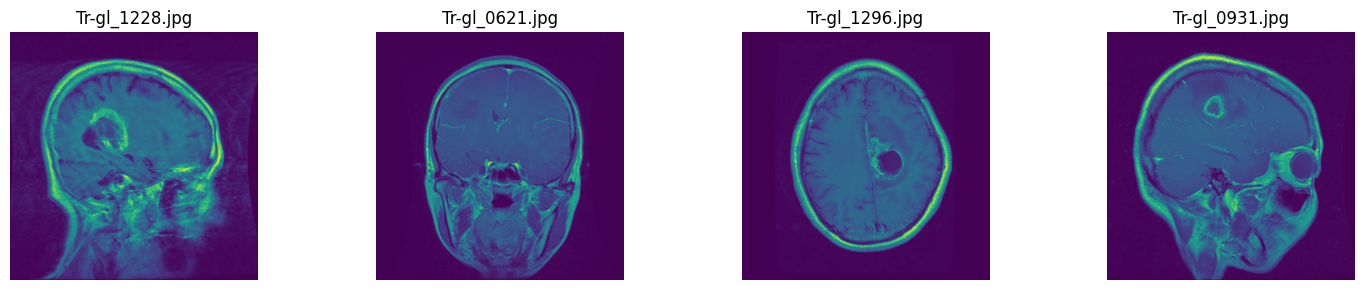

MENINGIOMA


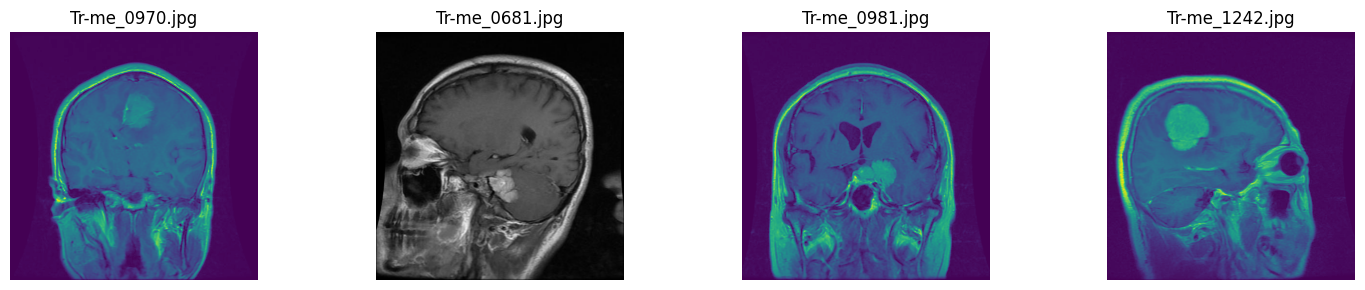

NOTUMOR


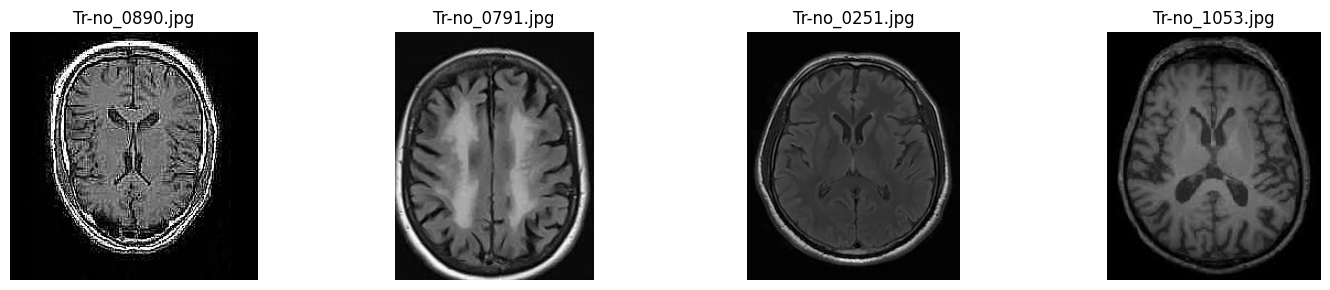

PITUITARY


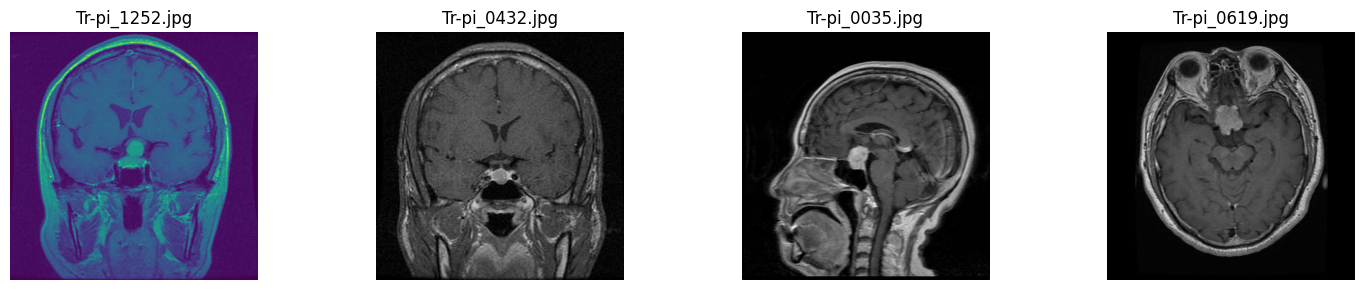

In [5]:
# Her bir sınıfın görüntülerini çizmek için yineleme
for label in classes:
    
    # Görselleştirilecek görselleri içeren yolu belirtin
    path_to_visualize = f"/kaggle/input/brain-tumor-mri-dataset/Training/{label}"

    # 3 rastgele görseli görselleştirin
    print(label.upper())
    visualize_images(path_to_visualize, num_images=4)

# <a id="Import"></a>
# <p style="background-color: #422057FF; font-family: 'Copperplate'; color:#FDDB27FF; font-size:140%; text-align:center; border-radius:1000px 10px;">4.0 Modeling</p> 

### **4.1 Model Building**

In [6]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(256, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())    
    
model.add(Flatten())

model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(4, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    58,982,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,396,676 (226.58 MB)

 Trainable params: 59,395,780 (226.58 MB)

 Non-trainable params: 896 (3.50 KB)

### **4.2 Model Compilation**

In [8]:
# Modele tamamla
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **4.3 Model Training**

In [9]:
# Model eğitimi

history = model.fit(train_ds, epochs=20, validation_data=val_ds, verbose=1)

Epoch 1/20


I0000 00:00:1721311193.029321     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721311193.052882     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.6424 - loss: 8.8195

W0000 00:00:1721311234.843702     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


90/90 ━━━━━━━━━━━━━━━━━━━━ 101s 594ms/step - accuracy: 0.6434 - loss: 8.7719 - val_accuracy: 0.3478 - val_loss: 7.4636
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.7895 - loss: 2.2085 - val_accuracy: 0.5400 - val_loss: 3.6771
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 302ms/step - accuracy: 0.8639 - loss: 1.2627 - val_accuracy: 0.7712 - val_loss: 0.9560
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - accuracy: 0.8737 - loss: 1.1735 - val_accuracy: 0.8406 - val_loss: 0.4664
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 306ms/step - accuracy: 0.9201 - loss: 0.4226 - val_accuracy: 0.8749 - val_loss: 0.3952
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.9307 - loss: 0.2349 - val_accuracy: 0.8940 - val_loss: 0.3148
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 301ms/step - accuracy: 0.9500 - loss: 0.1976 - val_accuracy: 0.9153 - val_loss: 0.2634
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 27s 302ms/step - accuracy: 0.9396 - loss: 0.2060 - val_accuracy: 0.93

### **4.4 Plotting the Graphs of Accuracy and Loss**

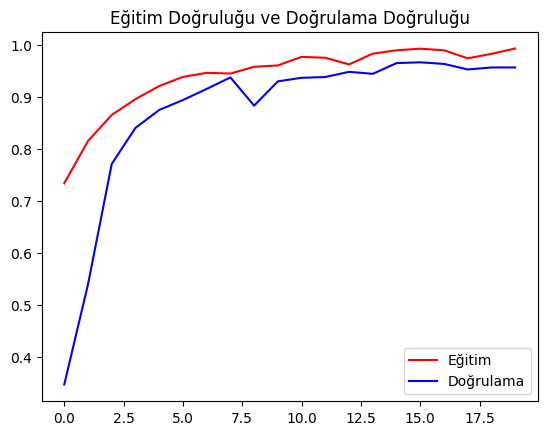

In [11]:
# Doğruluk ve Doğrulama Doğruluğu grafiğinin çizilmesi
plt.title('Eğitim Doğruluğu ve Doğrulama Doğruluğu')

plt.plot(history.history['accuracy'], color='red',label='Eğitim')
plt.plot(history.history['val_accuracy'], color='blue',label='Doğrulama')

plt.legend()

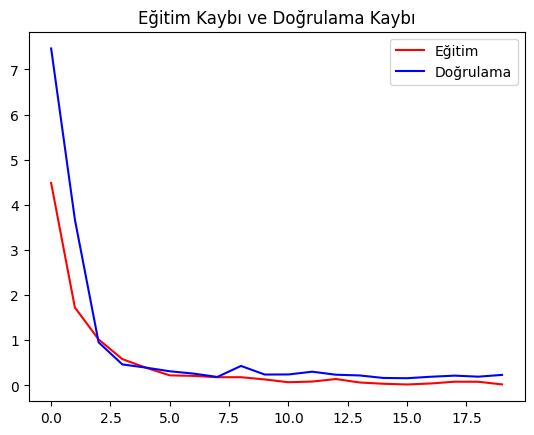

In [12]:
# Doğruluk ve Doğrulama kaybının grafiğinin çizilmesi
plt.title('Eğitim Kaybı ve Doğrulama Kaybı')

plt.plot(history.history['loss'], color='red',label='Eğitim')
plt.plot(history.history['val_loss'], color='blue',label='Doğrulama')

plt.legend()